# California House Prices - Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. 

Cleaning the data

In [3]:
df.duplicated().values.any()

False

Checking for Null Values

In [4]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [5]:
df.fillna(method="ffill", inplace=True)

In [6]:
# Checking for Null Values again
pd.isnull(df).any() 

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [7]:
# rows and columns
df.shape

(20640, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Feature Engineering

Add more number of features which can help with the proper distribution and predicting better values in our model

This dataset is about developments and households

- Average Rooms per House
- Average Bedrooms per House
- Number of people per household

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# Average Rooms per House
df['avgRooms'] = df['total_rooms']/df['households']

In [12]:
# Average Bedrooms per House
df['avgBedrooms'] = df['total_bedrooms']/df['households']

In [13]:
# Number of people per household
df['pop_per_household'] = df['population']/df['households']

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgRooms,avgBedrooms,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


Plot population 

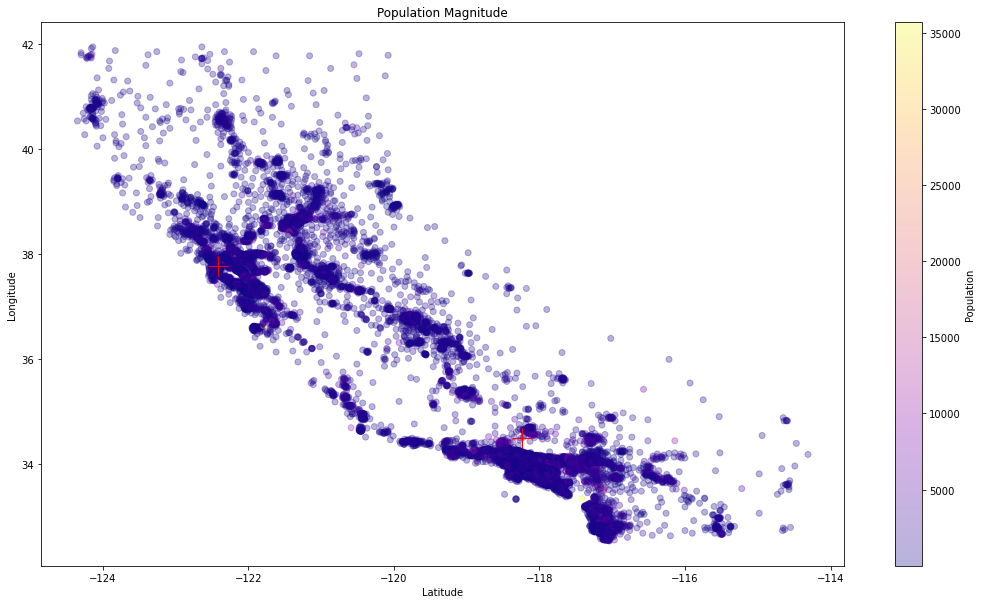

In [16]:
plt.figure(figsize=(18,10))
y_axis = df['latitude']
x_axis = df['longitude']
color = df['population']
plt.scatter(x_axis,y_axis,c=color, cmap='plasma', alpha = 0.3)
plt.plot(-122.4194,37.7749, color="r", markersize=20,marker="+");
plt.plot(-118.2423,34.50522, color="r", markersize=20,marker="+");
plt.title('Population Magnitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar().set_label("Population")

We find that the average population of California is about 1426 per block. The Distribution of the population is almost equal across California However, the population is more denser in the Northern Part of California

Average Distribution of Median Price of Housing in a Block

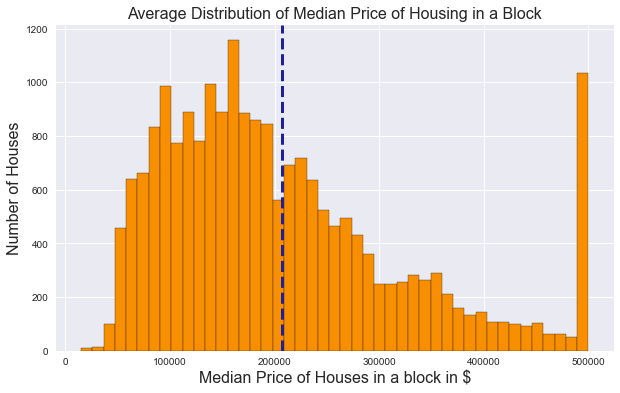

In [16]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, ec = 'black', color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16)
plt.axvline(df['median_house_value'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Price of House in a block');

Plot the mean house price

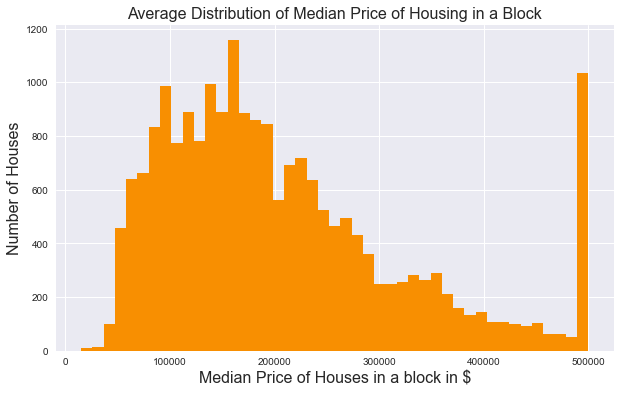

In [17]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn')
data = df["median_house_value"]
plt.hist(data, bins = 45, color = '#f88f01')
plt.xlabel('Median Price of Houses in a block in $', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Median Price of Housing in a Block', fontsize=16);

We find that the mean house price is around 206855

However the median value is 179700

We also observe a spike around the $5000000, since the number of houses in that range are quite high. This proves that there are more number of luxury, expensive homes in California.

Plot Average Distribution of Total Number of Households in a block

(0.0, 2500.0)

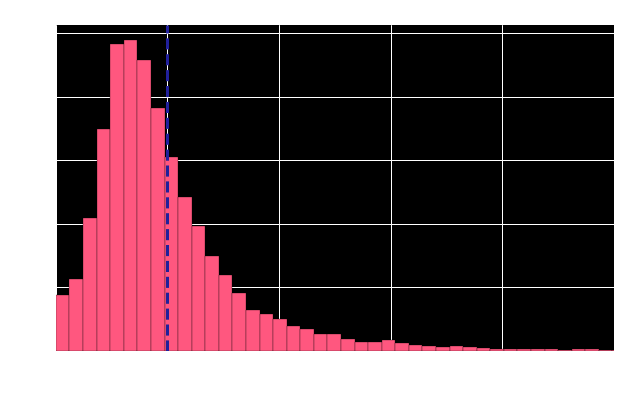

In [18]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
data = df["households"]
plt.hist(data , bins=100, ec = 'black', color = '#ff577f')
plt.xlabel('Total Number of Households in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Total Number of Households in a block', fontsize=16)
plt.axvline(df['households'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Households in a block')
plt.xlim(0,2500)

In [19]:
print(round(df.households.mean()))
print(df.households.median())

500
409.0


We find that the average number of houses per block is around 500 households. Whereas the median of the data lies at 409 houses per block

Plot Average Distribution of Number of Rooms

(0.0, 10.0)

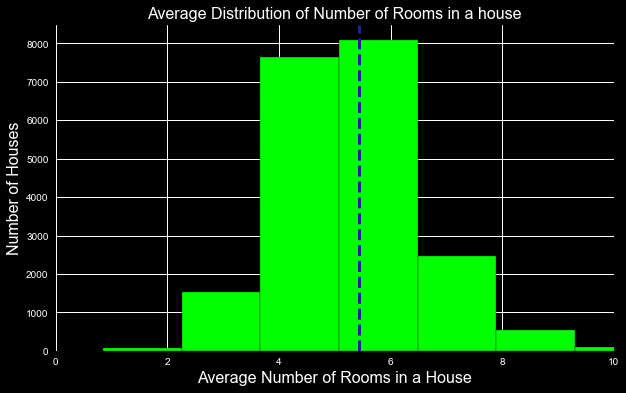

In [20]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
data = df["avgRooms"]
plt.hist(data, bins=100, ec = 'black', color = '#00FF00')
plt.xlabel('Average Number of Rooms in a House', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.title('Average Distribution of Number of Rooms in a house', fontsize=16)
plt.axvline(df['avgRooms'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Rooms in a House')
plt.xlim(0, 10)

In [21]:
print("Mean Rooms",round(df.avgRooms.mean()))
print("Median Rooms",round(df.avgRooms.median()))

Mean Rooms 5
Median Rooms 5


The Mean number of rooms per house is between 4 and 5. The median is also at that range. However there are many houses with 6, 7 and 8 rooms as well.

Plot Average Distribution of Total Number of Rooms in a block

(0.0, 12500.0)

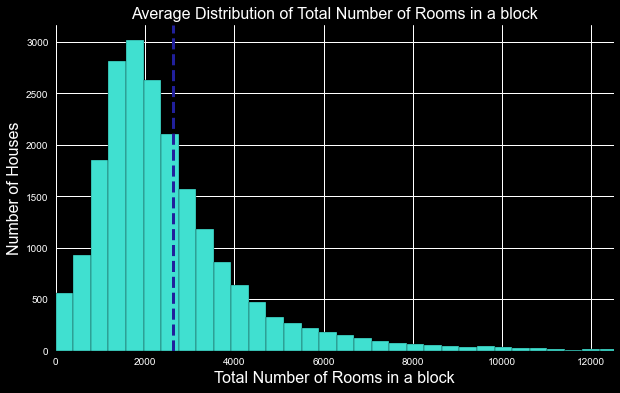

In [22]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background')
data = df["total_rooms"]
plt.hist(data, bins=100, ec = 'black', color = '#40E0D0')
plt.xlabel('Total Number of Rooms in a block', fontsize=16)
plt.ylabel('Number of Houses', fontsize=16)
plt.axvline(df['total_rooms'].mean(), color='#21209c', linestyle='dashed', linewidth=3, label='Average Number of Rooms in a block')

plt.title('Average Distribution of Total Number of Rooms in a block', fontsize=16)
plt.xlim(0, 12500)

In [23]:
print("Rooms mean",round(df.total_rooms.mean()))
print("Rooms median",round(df.total_rooms.median()))

Rooms mean 2636
Rooms median 2127


The Mean number of rooms per block is 2636 The median is at 2127.

Ocean Proximity

In [24]:
freq = df["ocean_proximity"].value_counts()
freq

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Text(0, 0.5, 'No. of Households')

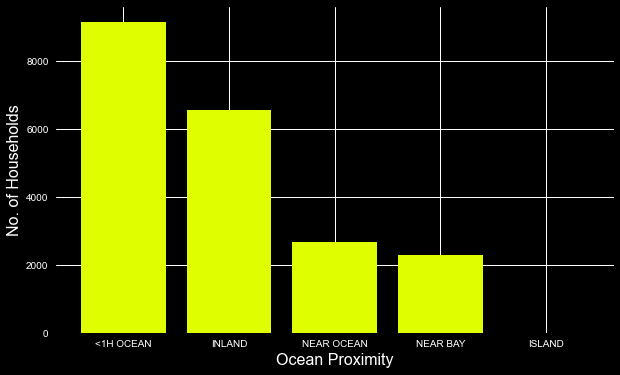

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(freq.index, height = freq, color='#DFFF00')
plt.xlabel('Ocean Proximity', fontsize=16)
plt.ylabel('No. of Households', fontsize=16)

We find that more number of houses 9136 are located at a range that is less than 1 hour to the ocean. However, there is also a large number of homes inland away from the ocean. Later, we also find that the price of homes near the ocean are compartively higher.

Correlation

Text(0.5, 1.0, 'Median Price vs Average Number of Rooms')

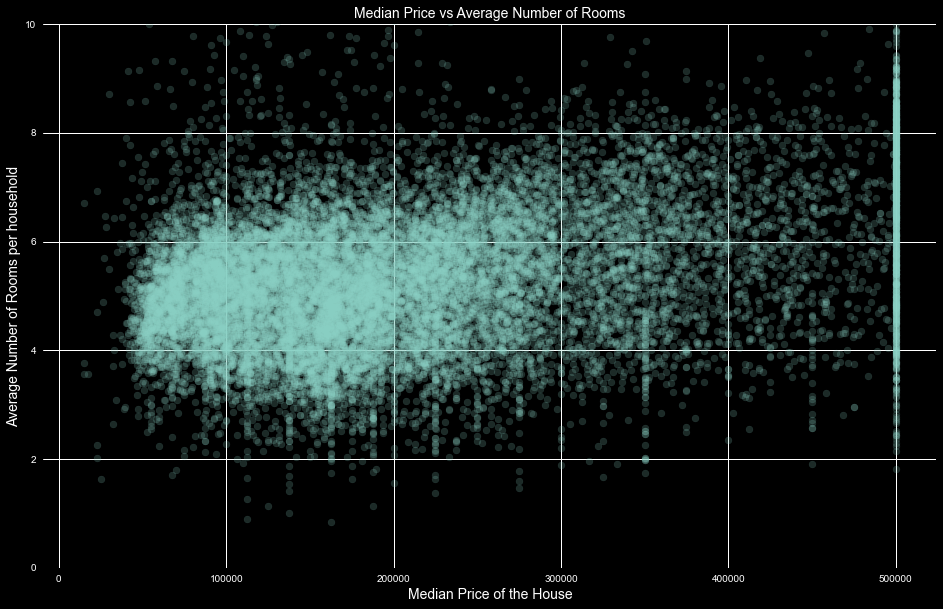

In [26]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
x = df['median_house_value']
y = df['avgRooms']
plt.scatter(x, y, alpha=0.2)
plt.ylim(0, 10)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Rooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Rooms', fontsize = 14)

<Figure size 864x720 with 0 Axes>

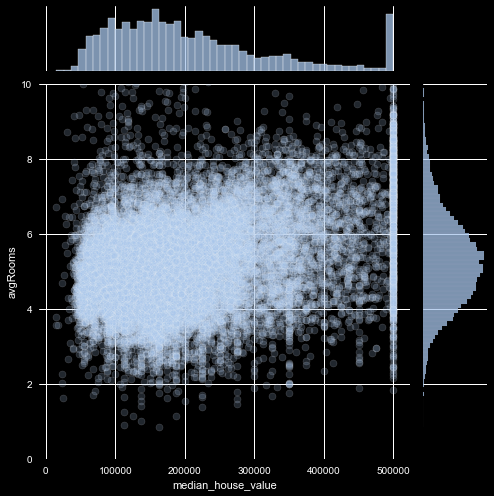

In [27]:
plt.figure(figsize=(12,10))
plt.style.use('dark_background')
sns.jointplot(x=df['median_house_value'], y=df['avgRooms'], height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
sns.set_style('darkgrid')
plt.ylim(0, 10);

In [28]:
df["median_house_value"].corr(df["avgRooms"])

0.1519482897414578

Text(0.5, 1.0, 'Median Price vs Average Number of Bedrooms')

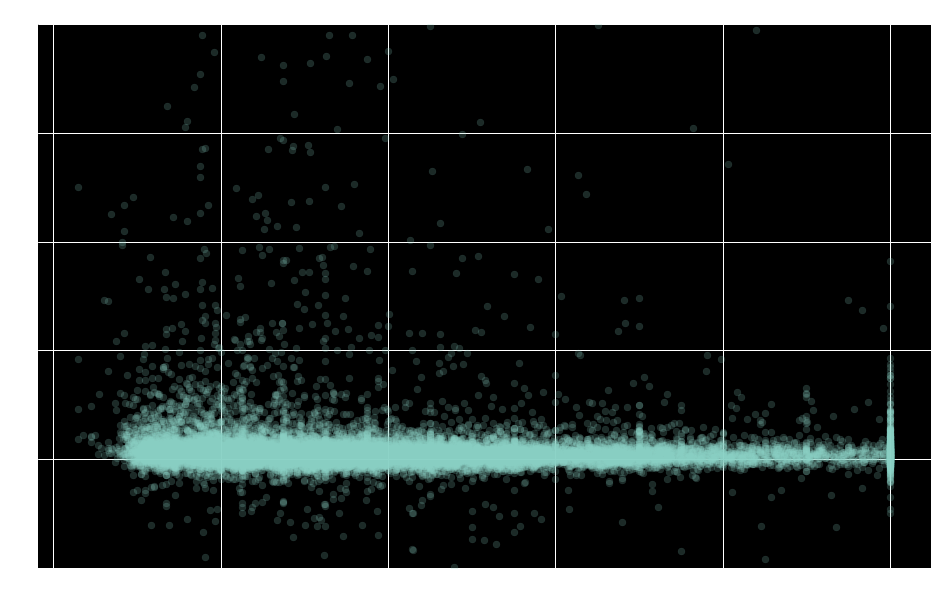

In [29]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
plt.scatter(x= df['median_house_value'], y=df['avgBedrooms'], alpha=0.2)
plt.ylim(0, 5)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Bedrooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Bedrooms', fontsize = 14)

Text(0.5, 1.0, 'Median Price vs Average Number of Bedrooms')

<Figure size 1152x720 with 0 Axes>

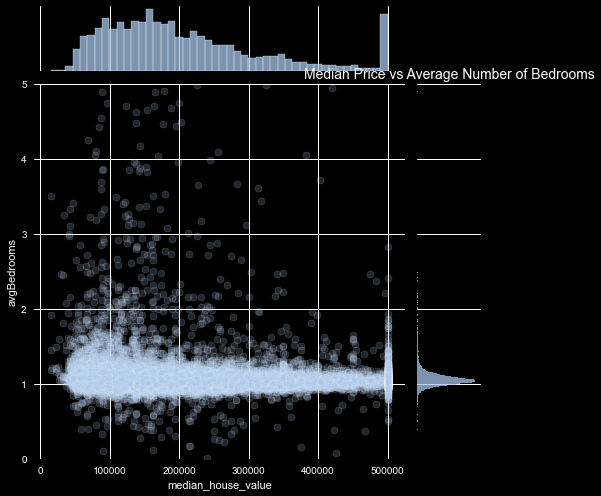

In [30]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
sns.jointplot(x=df['median_house_value'], y=df['avgBedrooms'], height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
sns.set_style('darkgrid')
plt.ylim(0, 5)
plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Average Number of Bedrooms per household', fontsize = 14)
plt.title('Median Price vs Average Number of Bedrooms', fontsize = 14)

In [31]:
df["median_house_value"].corr(df["avgBedrooms"])

-0.04321494098036476

Text(0.5, 1.0, 'Median Price vs Population per Household in 10,000s')

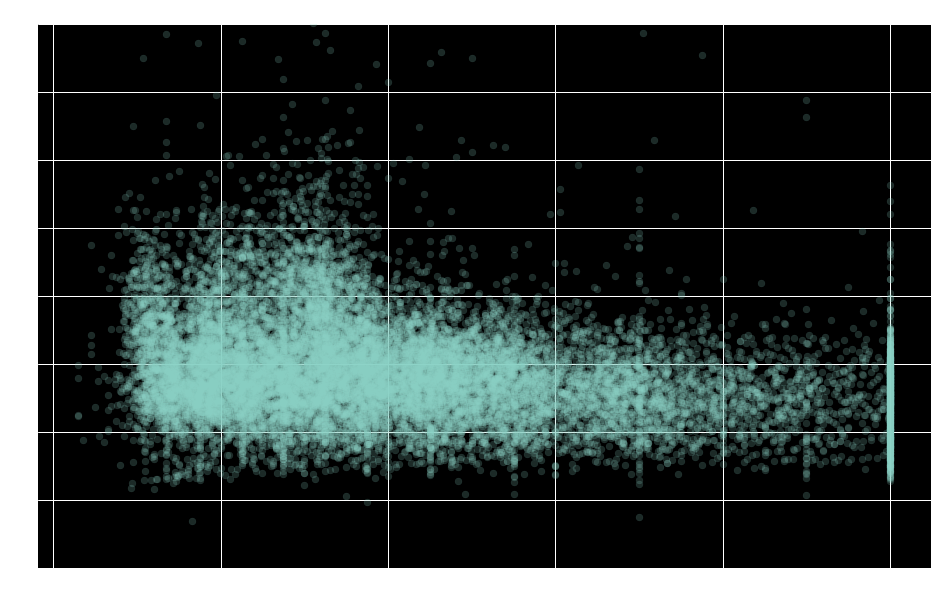

In [32]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
plt.scatter(x= df['median_house_value'], y=df['pop_per_household'], alpha=0.2)
plt.ylim(0, 8)

plt.xlabel('Median Price of the House', fontsize = 14)
plt.ylabel('Population per Household', fontsize = 14)
plt.title('Median Price vs Population per Household in 10,000s', fontsize = 14)

(0.0, 8.0)

<Figure size 1152x720 with 0 Axes>

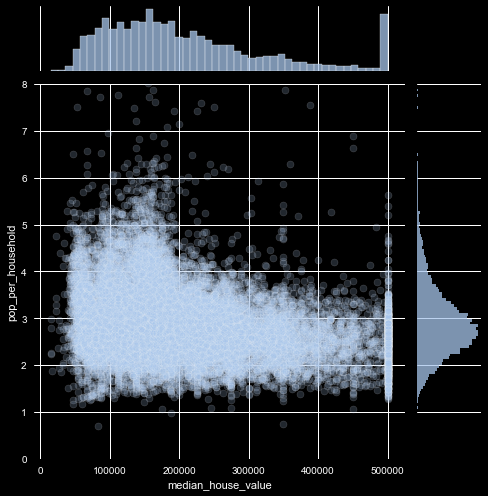

In [33]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
sns.jointplot(x= df['median_house_value'], y=df['pop_per_household'] , height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
plt.ylim(0, 8)

In [34]:
df["median_house_value"].corr(df["pop_per_household"])

-0.02373741295613434

(0.0, 10.0)

<Figure size 1152x720 with 0 Axes>

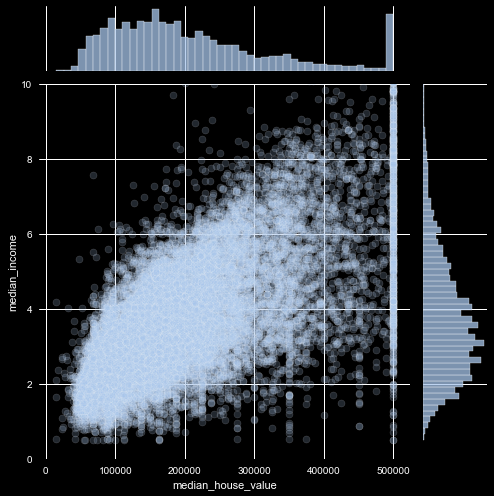

In [35]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
sns.jointplot(x= df['median_house_value'], y=df['median_income'], height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})
plt.ylim(0, 10)

In [36]:
df["median_house_value"].corr(df["median_income"])

0.688075207958548

<Figure size 1152x720 with 0 Axes>

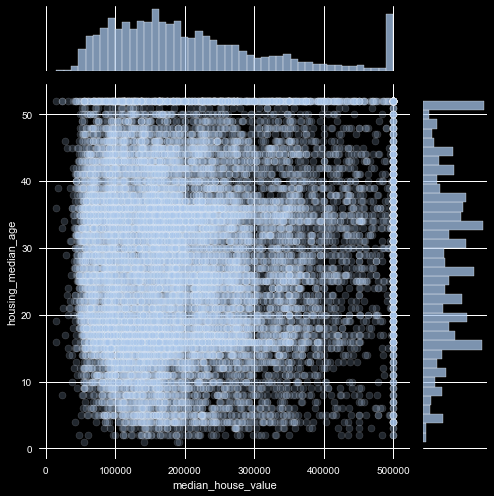

In [37]:
plt.figure(figsize=(16, 10))
plt.style.use('dark_background')
sns.jointplot(x= df['median_house_value'], y=df['housing_median_age'], height = 7, color = '#a7c5eb', joint_kws={'alpha': 0.2})

In [38]:
df["median_house_value"].corr(df["housing_median_age"])

0.10562341249320994

In [39]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.016723,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,0.057120,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,-0.059806,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,0.134153,0.133798,0.013346,-0.024581
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.049294,0.001913,0.052580,-0.028243
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,-0.024650,-0.072213,-0.070148,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.065843,-0.080598,-0.061542,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.688075,0.326895,-0.044738,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049294,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.043215,-0.023737
avgRooms,-0.027540,0.106389,-0.153277,0.133798,0.001913,-0.072213,-0.080598,0.326895,0.151948,1.000000,0.737612,-0.004852


Heatmap

A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

In [40]:
mask = np.zeros_like(df.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

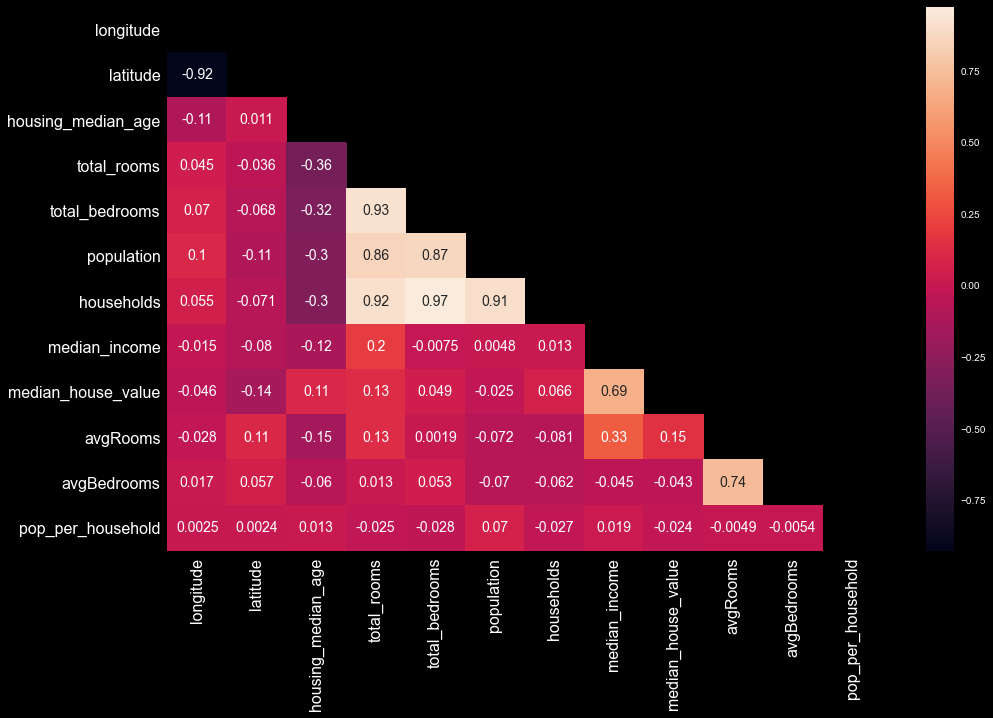

In [41]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
plt.style.use('dark_background')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [42]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgRooms,avgBedrooms,pop_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


Feature Engineering: Dummy Variable

Create a dummy variable inorder to categorize the ocean proximity attribute in the dataset

In [44]:
dum = pd.get_dummies(df.ocean_proximity)
dum.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [45]:
project_df = pd.concat([df, dum], axis = 'columns')

In [46]:
project_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avgRooms,avgBedrooms,pop_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,1,0


In [48]:
project_df.drop(['ocean_proximity', 'ISLAND'], axis='columns', inplace=True)
project_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0


Training and Test Dataset Split

In [49]:
prices = project_df['median_house_value']

In [50]:
features = project_df.drop('median_house_value', axis = 1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.3)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

Intercept

In [55]:
lr.intercept_

-2143631.586544605

In [57]:
pd.DataFrame(data = lr.coef_, index=X_train.columns, columns = ['Coef'])

,Coef
longitude,-27355.005592
latitude,-26502.128748
housing_median_age,1011.188903
total_rooms,-5.246432
total_bedrooms,54.050114
population,-43.378974
households,108.836792
median_income,37480.917304
avgRooms,2366.122864
avgBedrooms,-2799.327072


In [59]:
lr.score(X_train, y_train)

0.649658107468976

In [61]:
lr.score(X_test, y_test)

0.6379248161772897

We find that our model has an accuracy of around 64%
We can use our model to predict the value of any house by providing the given attributes with 63% accuracy

In [64]:
project_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avgRooms,avgBedrooms,pop_per_household,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0


In [65]:
data_set_for_prediction = project_df[["total_rooms", "<1H OCEAN","INLAND","NEAR BAY","NEAR OCEAN"]]

In [66]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_set_for_prediction,prices, test_size=0.3)

In [67]:
lr1 = LinearRegression()

In [68]:
lr1.fit(X_train1,y_train1)

LinearRegression()

In [70]:
lr1.predict([[1000, 1,0,0,0]])

array([227672.17789053])

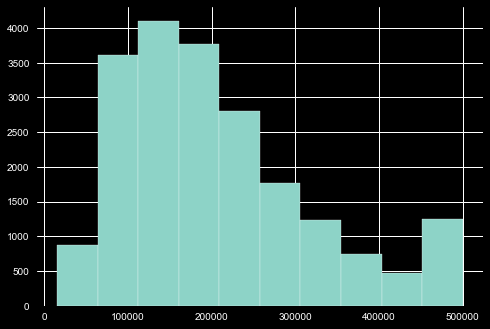

In [76]:
plt.hist(prices);